In [1]:
%matplotlib inline

import warnings
import numpy
import os
import seaborn
import polars
from astropy.io import fits
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

plt.ion()

TABLES_DIR = '../../data/tables/'
CCD_DATA_DIR = '../../data/example-cryo-LFC/'

(data-visualisation)=

# Plotting and data visualisation

:::{note}
You can download this lecture as {nb-download}`data_visualisation.ipynb` or {download}`data_visualisation.md` and follow along.
:::

Being able to efficiently organise and visualise data is a critical part of the data analysis process. In previous sections we have used plotting to display images and other types of data. Here we will look into the theory and technical details for effective data visualisation.

Let's start with a [definition](https://en.wikipedia.org/wiki/Data_and_information_visualization): _data visualisation is the practice of designing and creating graphic or visual representations of a large amount of complex quantitative and qualitative data and information with the help of static, dynamic or interactive visual items._ This definition touches on some of the key elements of data visualisation:

- Data visualisation is the process of transforming large, complex data into visual elements that are easy to comprehend.
- Data visualisation is intimately related to _dimensionality reduction_. From a set of complex, multi-variable data, data visualisation can help understand the key underlying trends by removing or collapsing some of the dimensions.
- Data visualisation does not only include traditional static "plots", but also dynamic visualisations (e.g., videos or simulations) and interactive elements.

Let's look at a simple example of data visualisation in astronomy. The [BOSS project](https://www.sdss4.org/surveys/boss/) is a part of the Sloan Digital Sky Survey that for year has been determining the distance to galaxies in the local Universe via redshift measurements. The result is a "table" of millions of those measurements that include the distance to the galaxy and the position on the sky (for example, in Galactic coordinates with respect to the plane of the Galaxy). Such a dataset is very hard for any person to digest and understand. However, when we plot the data correctly we can see that there is a lot of information that would have been easy to miss without a proper visualisation.

![BOSS data visualisation](./images/boss-galaxy-map.png){w="80%" align=center}

This visualisation shows the density of galaxies in the local Universe in a polar plot, with the radial direction representing the distance to the galaxies (as redshift) and the other the Galactic longitude. We immediately see that the galaxies are not uniformly distributed, but instead form a series of "tendrils" and "voids" that correspond to the large-scale structure of the Universe (these include groups, clusters and superclusters of galaxies). Note that in choosing how to plot the data we have made a decision on what variables to display: for example we could have plotted the data in cartesian coordinates as a 3D plot using both the Galactic longitude and latitude, but that would have made the plot harder to read and interpret.

## Types of plots

Let's now discuss different types of plots and how to choose the right one to visualise your data. This section is heavily based, and uses many plots, from the excellent [seaborn tutorials](https://seaborn.pydata.org/tutorial.html), which we will use often to generate our plots. [seaborn](https://seaborn.pydata.org/) is a plotting library that build on top of [matplotlib](https://matplotlib.org/) and provides a high-level interface for drawing attractive statistical graphics.

We will start by having a look at the different types of variables that we may encounter in our data. As we discuss different kinds of plots it will became obvious how they are associated to different types of variables. Variables can be classified in three main groups:

- A _discrete variable_ can only take certain values out of a (potentially) infinite range. E.g., natural numbers, number of pets in a household, photons received, etc.
- A _continuous variable_ can take any value in an infinite range. E.g., real numbers, height, mass, voltage, etc.
- A _categorical variable_ can take a (limited) number of values that are not necessarily numerical. E.g., months, male/female/non-binary, yes/no.

![Types of variables](./images/types-variables.png){w="90%" align=center}

### Scatter plots

Scatter plots highlight the relationship between two or more continuous variables for which we have specific measurements (for example from lab experiments). For example, we may have a database that tracks the tip left by a client in a restaurant and the total bill. We can then plot the tip against the bill to see if there is a correlation between the two variables.

![Scatter plot](./images/scatter-plot.png){w="60%" align=center}

Additional categorical variables can be added to the plot by using different colours or shapes for the points (markers). For example, we could use different colours (hue, as we'll see later) to represent the type of restaurant (e.g., fast food, fine dining, etc.) or the day of the week, if that information is available in our dataset.

### Line plots

Line plots are used to highlight the continuous relationship between two variables. At its core they are just a scatter plot with the points connected by a line, but they are particularly useful for showing trends in the data. In the following plot with see the evolution of the price of a stock over time.

![Line plot](./images/line-plot.png){w="60%" align=center}

As in the case of scatter plots, we can use different line colours or styles (e.g., dashed, dotted) to represent additional categorical variables or to highlight specific trends in the data. We can also use shaded regions or error bars to represent the uncertainty in the measurements or the confidence intervals of the data.

![Line plot with error bars](./images/line-plot-hue.png){w="60%" align=center}

### Histograms and KDE

A histogram plots (or bin plots) is a representation of the distribution of a discrete or continuous variable. On the x-axis we have the possible values of the variable (either the values the variable can take in the case of a discrete variable, or a series of "bins" in the case of a continuous variable) and on the y-axis we have the number of occurrences of each value (or bin). Histograms can also represent the probability distribution of a variable.

![Histogram](./images/hist-plot.png){w="60%" align=center}

Histograms are critical to understand and explain the scope of our data. A good advice is always to start with a histogram of the data you are working with, as it will give you a good idea of the distribution of the variable (for example, is it a flat distribution, peaked, bimodal, etc.).

Another way to represent the distribution of a continuous variable is to use a [kernel density estimate (KDE)](https://en.wikipedia.org/wiki/Kernel_density_estimation). A KDE is a smoothed version of the histogram that uses a kernel function (usually a Gaussian) to estimate the probability density function of the variable. The result is a continuous curve that represents the distribution of the variable. KDE plots are useful to highlight the main feature of a distribution. For example, in the previous histogram the data seems to have a bimodal distribution, but this is shown much more clearly in the KDE plot below.

![KDE plot](./images/kde-plot.png){w="60%" align=center}

### Bar plots

Bar plots are used to represent values associated with a categorical or discrete variable. One axis represents the categories and the y-axis represents the associated value for each category. Bar plots are similar to histograms but they are not limited to representing the distribution of a variable. In the example below we have a categorical variable (the states of the US) and associated values (automobile collisions per billion of miles driven). We can use different colours to represent additional variables, for example the number of those collisions caused by alcohol consumption.

![Bar plot](./images/bar-plot.png){w="60%" align=center}

### Bivariate distributions

Bivariate distribution plots are similar to histograms, but in this case we have two continuous or discrete variables. The result is a 2D plot in which for each pair of values or bins we show the number of occurrences or the probability density using a colour scale. 2D histograms are very useful to understand data in visualisations where scatter plots hide the "density" of our distribution. We wil see an example of this later in this section.

![Bivariate histogram](./images/hist-2d-plot.png){w="60%" align=center}

As in the case of univariate histograms, we can use a KDE to represent the bivariate distribution. The result is what is sometimes called a "contour plot", which shows the density of the data in a 2D space. The contour lines represent the regions of equal density.

![Bivariate KDE](./images/kde-2d-plot.png){w="60%" align=center}

### Violin and box plots

Violin and box plots are used to represent the distribution of a continuous variable associated with a categorical variable. They are similar to histograms, but they show the distribution of the variable for each category. Violin plots are similar to KDE plots, but they show the distribution of the variable for each category. Box plots are a simplified version of violin plots that show the median, quartiles and outliers of the distribution.

![Violin plot](./images/violin-plot.png){w="60%" align=center}

![Box plot](./images/box-plot.png){w="60%" align=center}

Violin and box plots pack a lot of information and can sometimes be hard to read, but they are useful to quickly summarise all the main feature of a distribution.

### Multigrid plots

Multigrid plots show the relationship between a set of variables. They are useful to understand the correlations between the different variables in a dataset. There are many types of multigrid plots; the following one shows the pairwise relationships between the different components of a flower. The diagonal shows the distribution of each variable as a KDE plot.

![Multigrid plot](./images/multigrid-plot.png){w="60%" align=center}

### Images

Images are a special case of 2D histogram in which for each element in a regular 2D grid (you can think of these as "pixels") we represent the value of the image at that spatial position. In a raw CCD image this would be the number of electrons/photons detected at that pixel. As we will see below, it's important to think about the limits and stretch of the data we are visualising.

## Colours and palettes

So far we have referred loosely to the concept of "colour" in our plots. Colour, in the data visualisation context, is defined by three elements:

- _Hue_: quality of light that distinguishes between different colours.
- _Saturation_: amount of hue present in a colour.
- _Luminance_: how dark/light a colour is.

:::{figure-md}
![Hue](./images/hue.png){w="60%" align=center}

Hue
:::

:::{figure-md}
![Saturation](./images/saturation.png){w="60%" align=center}

Saturation
:::

:::{figure-md}
![Luminance](./images/luminance.png){w="60%" align=center}

Luminance
:::

As a general rule we use different hues to represent different categorical variables, while we use saturation and luminance to represent continuous variables. For example, in this two scatter plots we are representing the same data. On the left we use markers to differentiate between to types of data points (categorical variable), while on the right we use additionally change the hue of the markers. It's clear that the right plot makes the different variables much more distinguishable.

![Scatter plot with hue](./images/scatter-hue.png){w="60%" align=center}

Similarly, we can plot a 2D histogram using different hues to represent the density of the data as we do on the left panel in the following plot. Even with a colour bar that associates hues to numerical values it's hard to visually correlate those two parameters. On the right we use a different colour palette that uses saturation to represent the density of the data, which makes it much easier to read.

![2D histogram with luminance](./images/hist-2d-luminance.png){w="60%" align=center}

The range of colours that we use to represent our data is called a _colour palette_. Different colour palettes are better suited for different types of data. For discrete variables, as we saw before, we prefer a palette in which the hue changes, thus highlighting the different categories. This type of palette is called a _qualitative palette_ or _discrete palette_.

![Qualitative palette](./images/discrete-palette.png){w="60%" align=center}

For continuous variables, we prefer a palette in which the hue remains constant and the saturation and luminance change, thus highlighting the different values of the variable. This type of palette is called a _sequential palette_.

![Sequential palette](./images/sequential-palette.png){w="60%" align=center}

When we have a continuous variable that can take both positive and negative values, we need to use a different type of palette. In this case we want to highlight the two extremes (positive and negative) using different hues, while keeping the saturation and luminance constant. This type of palette is called a _diverging palette_.

For data that has both positive and negative values, or a clear tipping point, we use a _diverging palette_ that uses two different hues to represent the two extremes.

![Diverging palette](./images/diverging-palette.png){w="60%" align=center}

Choosing the right palette is critical to make our plots readable and understandable. Matplotlib and seaborn provide a wide range of colour palettes that can be used in our plots. You can find a list of the available palettes in the [seaborn documentation](https://seaborn.pydata.org/tutorial/color_palettes.html) and in the [matplotlib documentation](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

Finally, it's important to remember that not all colours are distinguishable by all people. For example, people with colour blindness may have trouble distinguishing between certain hues. To make our plots accessible to everyone, we should use colour palettes that are friendly to colour blindness. The following image shows several discrete palettes and how they are perceived by people with different types of colour blindness (deuteranopia and protanopia).

![Colour blindness palettes](./images/colour-blindness-palettes.png){w="100%" align=center}

A good resource to check how your plots look like for people with colour blindness is the [Color Universal Design (CUD) website](https://jfly.uni-koeln.de/color/), which provides a detailed explanation of how colour blindness affects perception. This [page](https://davidmathlogic.com/colorblind/) also provides a good overview of the different types of colour blindness and how to make your plots accessible to everyone.

## Displaying astronomical images

Let's now focus on a specific type of data visualisation that is very common in astronomy: displaying astronomical images. We have already seen how to do this in previous sections and using DS9, but now we'll introduce a few additional concepts.

When displaying image data we need to consider three main aspects: what range of data values we want to display (the interval), how we are mapping the data values to colours (the stretch, e.g., linear or logarithmic), and the colour palette we are using. Let's look at these in detail with an example.

We will start by displaying one of our [reduced CCD images](#basic-ccd-reductions) using [matplotlib.imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html). This function displays a 2D array as an image, with the values of the array mapped to colours using a colour palette.

In [2]:
os.chdir(CCD_DATA_DIR)

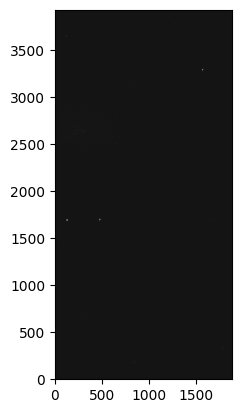

In [3]:
data = fits.getdata('ccd.037.0_proc.fits').astype('f4')
_ = plt.imshow(data, cmap='gray', origin='lower')

We do not see a lot of detail in this image. As we commented before, it's always a good idea to start with a histogram of the data to understand its distribution. Let's do that now. We will use the `seaborn.histplot` function to plot the histogram of the data values.

Min: -4465.52
Max: 58307.80
Mean: 713.19
First quartile: 690.94
Ninety-ninth percentile: 869.74


Ninety-ninth percentile: 869.74


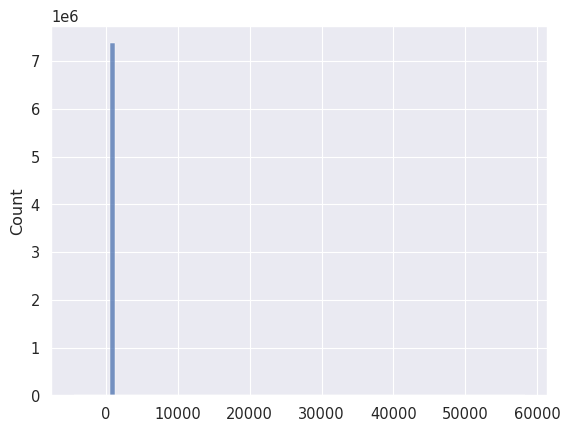

In [4]:
# Set up seaborn style to make the plots look nice
seaborn.set_theme('paper', color_codes=True, palette='deep', font_scale=1.2)

# Print some statistics of the data
print(f'Min: {data.min():.2f}')
print(f'Max: {data.max():.2f}')
print(f'Mean: {data.mean():.2f}')
print(f'First quartile: {numpy.percentile(data, 25):.2f}')
print(f'Ninety-ninth percentile: {numpy.percentile(data, 99):.2f}')

_ = seaborn.histplot(data.flatten(), bins=100)

Even when we define a hundred bins we see that most of the data values are concentrated in a very small range. The 99% percentile tells us that 99% of the data values are below 869 counts, but we have at least some values going as high as 58300 counts. Let's redo the plot but displaying only the values below 1000 counts.

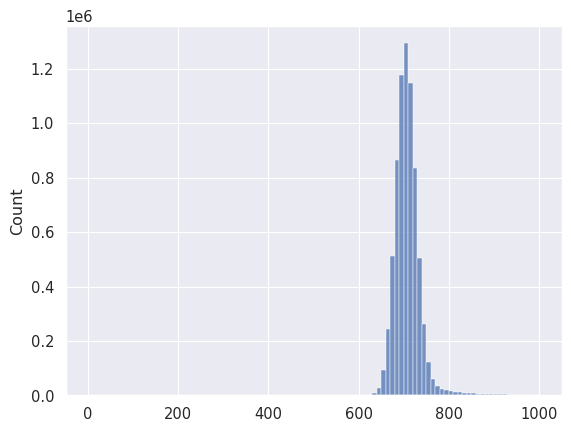

In [5]:
data_low = data[(data < 1000) & (data > 0)]
_ = seaborn.histplot(data_low.flatten(), bins=100)

With this information, let's plot the image again, but this time using some data limits, which in `imshow` with can pass using the `vmin` and `vmax` parameters.

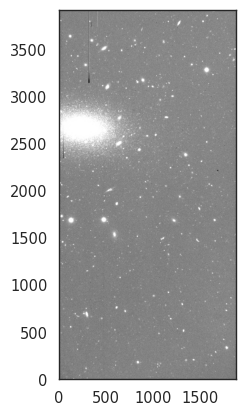

In [6]:
seaborn.set_style('white')

_ = plt.imshow(data, cmap='gray', origin='lower', vmin=600, vmax=800)

That's significantly better! What we have done is to adjust the interval of the data that we are displaying. [astropy.visualization](https://docs.astropy.org/en/stable/visualization/index.html) provides a set of functions to help with this process, including `astropy.visualization.ImageNormalize`, which allows us to normalise the data values to a specific range.

There are, generally, two algorithms for data range interval: minmax and z-scale. The former simply displays all the values. The latter does something similar to what we did with the histogram but using a faster, less precise algorithm. The details can be found [here](https://astro.uni-bonn.de/~sysstw/lfa_html/iraf/images.tv.display.html).

In [7]:
from astropy.visualization import ZScaleInterval, MinMaxInterval

zscale = ZScaleInterval()
minmax = MinMaxInterval()

print(f'Z-scale interval: {zscale.get_limits(data)}')
print(f'Minmax interval: {minmax.get_limits(data)}')

Z-scale interval: (np.float32(624.99835), np.float64(841.6901693431514))
Minmax interval: (np.float32(-4465.523), np.float32(58307.805))


See how the range of values in the z-scale interval is very similar to the ones we found using the histogram. To use this interval we can create a matplotlib normalisation object and pass it to `imshow`.

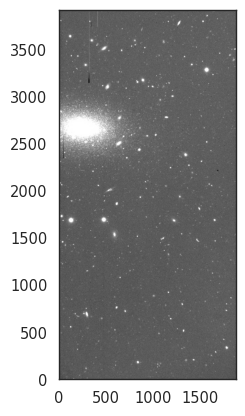

In [8]:
from astropy.visualization import ImageNormalize, LinearStretch

norm = ImageNormalize(data, interval=ZScaleInterval())
_ = plt.imshow(data, cmap='gray', origin='lower', norm=norm)

So far we have used a linear mapping between the values of the image and the colour levels (saturation and luminance). We can also use a logarithmic mapping, which is useful to highlight faint features in the image. To do this we can use the `LogStretch` class from `astropy.visualization`.

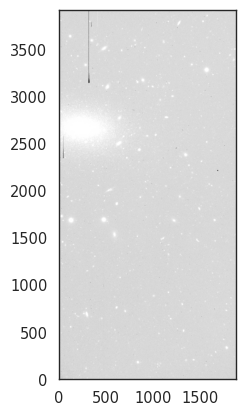

In [9]:
from astropy.visualization import LogStretch

norm_log = ImageNormalize(data, interval=ZScaleInterval(), stretch=LogStretch())
_ = plt.imshow(data, cmap='gray', origin='lower', norm=norm_log)

There are other stretches available in `astropy.visualization`, such as `SqrtStretch` and `AsinhStretch`, which can also be useful depending on the characteristics of the data being visualized.

Finally, let's look at the colour palettes for visualising data. Until now we have used a simple grayscale palette, but we can use other palettes to highlight different features in the data. CCD data is typically sequential, so we will generally want to use a sequential palette. For example, we can use the `viridis` palette, which is a good choice for displaying data with a wide range of values.

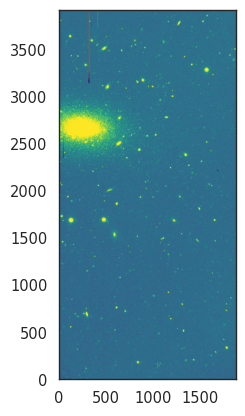

In [10]:
norm = ImageNormalize(data, interval=ZScaleInterval(), stretch=LinearStretch())
_ = plt.imshow(data, cmap='viridis', origin='lower', norm=norm)

Again, you can check all the available palettes in the [matplotlib documentation](https://matplotlib.org/stable/tutorials/colors/colormaps.html). All palettes accept a `_r` suffix to reverse the colours. For example, let's use a heat-like palette

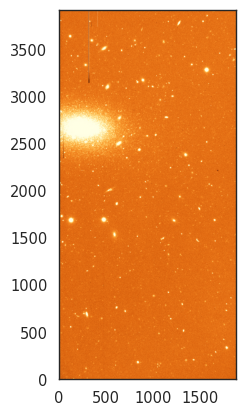

In [11]:
_ = plt.imshow(data, cmap='YlOrBr_r', origin='lower', norm=norm)

### Creating RGB images

It's important to differentiate between monochromatic data (e.g., a single CCD image) displayed using a colour map that uses different hues, and RGB images. The latter are created by combining three or more monochromatic images, each representing a different colour channel (red, green and blue).

RGB images are not very common in astronomy, but they are sometimes useful to visually identify features in the data (e.g., blue vs red galaxies), and to create beautiful images of astronomical objects. Ideally, an RGB image would result in an image that the human eye would perceive as a "natural" representation of the object being observed, assuming that our eye was more sensitive. In practice there is a certain element of subjectivity and multiple algorithms exist to create RGB images from monochromatic data. Astropy has a useful page on [how to create RGB images](https://docs.astropy.org/en/stable/visualization/rgb.html) so we will not repeat that here.

## Plotting tabular data

Let's now switch to looking into some common plotting techniques for tabular data. We will use the dataset `all_exoplanets_2021.parquet` which contains a list of all the exoplanets discovered up to 2021, including information such as the planet's mass, host star, discovery method and facility, etc.

In [12]:
os.chdir(TABLES_DIR)

In [13]:
planets = polars.read_parquet('all_exoplanets_2021.parquet')

print(planets.head(5))
print('Columns:', planets.columns)

shape: (5, 23)
┌─────┬────────────┬────────────┬───────────┬───┬────────────┬────────────┬────────────┬───────────┐
│ id  ┆ planet_nam ┆ planet_hos ┆ num_stars ┆ … ┆ stellar_me ┆ stellar_su ┆ distance   ┆ gaia_magn │
│ --- ┆ e          ┆ t          ┆ ---       ┆   ┆ tallicity_ ┆ rface_grav ┆ ---        ┆ itude     │
│ i16 ┆ ---        ┆ ---        ┆ i32       ┆   ┆ ratio      ┆ ity        ┆ f32        ┆ ---       │
│     ┆ str        ┆ str        ┆           ┆   ┆ ---        ┆ ---        ┆            ┆ f32       │
│     ┆            ┆            ┆           ┆   ┆ str        ┆ f32        ┆            ┆           │
╞═════╪════════════╪════════════╪═══════════╪═══╪════════════╪════════════╪════════════╪═══════════╡
│ 1   ┆ 11 Com b   ┆ 11 Com     ┆ 2         ┆ … ┆ [Fe/H]     ┆ 2.31       ┆ 93.184601  ┆ 4.44038   │
│ 2   ┆ 11 UMi b   ┆ 11 UMi     ┆ 1         ┆ … ┆ [Fe/H]     ┆ 1.93       ┆ 125.320999 ┆ 4.56216   │
│ 3   ┆ 14 And b   ┆ 14 And     ┆ 1         ┆ … ┆ [Fe/H]     ┆ 2.63       ┆ 

Let's start with a very simple scatter plot in which we relate the host start effective temperature to its mass.

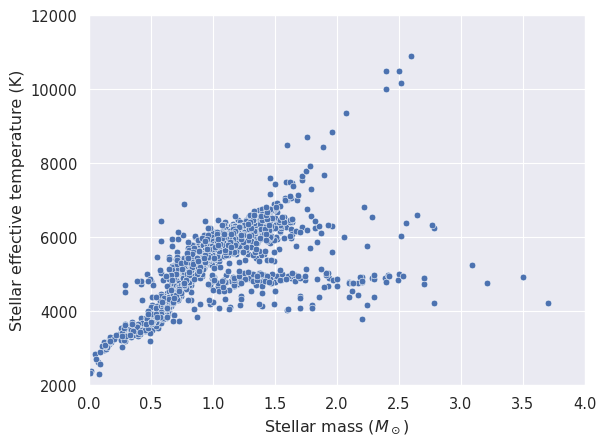

In [14]:
seaborn.set_style('darkgrid')

# Remove duplicates by keeping only the first occurrence of each host star.
stars = planets.unique(subset='planet_host', keep='first')

_ = seaborn.scatterplot(x=stars['stellar_mass'], y=stars['stellar_effective_temperature'])
_ = plt.xlabel('Stellar mass ($M_\\odot$)')
_ = plt.ylabel('Stellar effective temperature (K)')
_ = plt.xlim(0, 4)
_ = plt.ylim(2000, 12000)

It would be interesting to see how this distribution is affected by the stellar type. The column `spectral_type` contains the spectral type of the star, including its luminosity class. We will create a new column with only the stellar type (e.g., G, K, M) and use it to colour the points in the scatter plot.

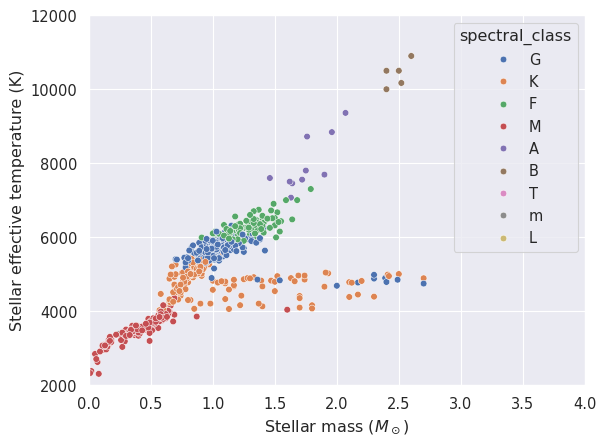

In [15]:
# Create a new column with only the stellar class
stars = stars.drop_nulls(subset=['spectral_type']).with_columns(spectral_class=polars.col.spectral_type.str.slice(0, 1))

_ = seaborn.scatterplot(x=stars['stellar_mass'], y=stars['stellar_effective_temperature'], hue=stars['spectral_class'])
_ = plt.xlabel('Stellar mass ($M_\\odot$)')
_ = plt.ylabel('Stellar effective temperature (K)')
_ = plt.xlim(0, 4)
_ = plt.ylim(2000, 12000)

:::{important}
We are using `seaborn` functions to plot the data. These functions simplify some of the details of producing nice-looking plots, but they are ultimately built on top of `matplotlib`. All these plots can be reproduced using `matplotlib` directly.
:::

We will now look at the histogram of number of planets per star. This dataset includes one planet per row, including planets that orbit the same start. We need to use a group-by operation to count the number of planets per star, and then plot the result as a histogram.

shape: (3_392, 2)
┌───────────────────┬─────┐
│ planet_host       ┆ n   │
│ ---               ┆ --- │
│ str               ┆ u32 │
╞═══════════════════╪═════╡
│ HD 181433         ┆ 3   │
│ Kepler-113        ┆ 2   │
│ Kepler-101        ┆ 2   │
│ Kepler-684        ┆ 1   │
│ MOA-2012-BLG-006L ┆ 1   │
│ …                 ┆ …   │
│ Kepler-1654       ┆ 1   │
│ Kepler-596        ┆ 1   │
│ WASP-8            ┆ 2   │
│ HIP 65 A          ┆ 1   │
│ Kepler-123        ┆ 2   │
└───────────────────┴─────┘


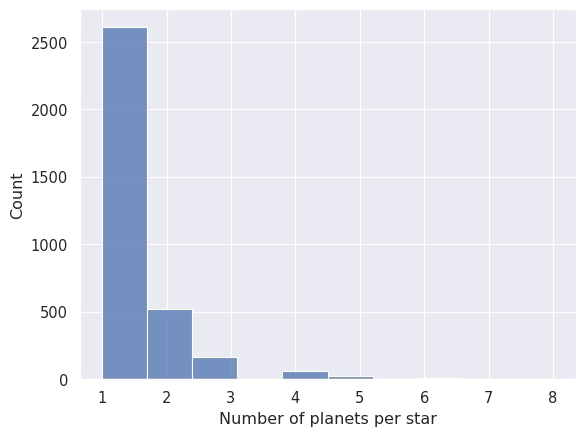

In [16]:
# Group by the host star and count the number of rows (planets) in each group
planets_per_star = planets.group_by('planet_host').len('n')
print(planets_per_star)

# Plot the histogram of number of planets per star
_ = seaborn.histplot(planets_per_star['n'], bins=10)
_ = plt.xlabel('Number of planets per star')

Not unexpectedly, most stars have only one planet. Let's look at the number of exoplanets discovered every year. We expect to see an steady increase in the number of discoveries over the years, as the technology and methods used to discover exoplanets have improved.

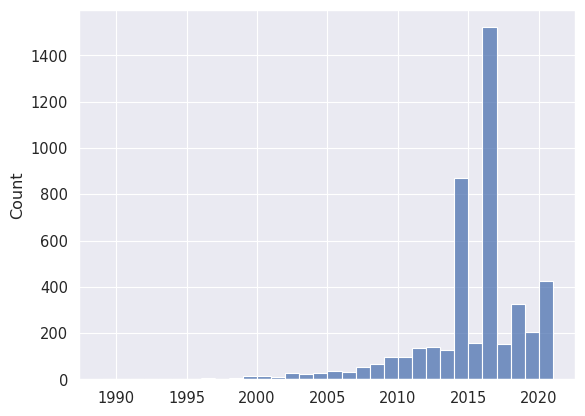

In [17]:
# Plot the histogram of number of planets discovered per year
_ = seaborn.histplot(planets['discovery_year'], binwidth=1)

Interestingly, we have huge peaks of discoveries in 2014 and 2016. These correspond to data releases of the [Kepler mission](https://kepler.nasa.gov/), which discovered thousands of exoplanets in a very short period of time using transit observations. Let's confirm this:

In [18]:
data_2014 = planets.filter(polars.col.discovery_year == 2014)
print(data_2014.group_by('discovery_facility').len('n').sort('n', descending=True))

shape: (21, 2)
┌─────────────────────────────────┬─────┐
│ discovery_facility              ┆ n   │
│ ---                             ┆ --- │
│ str                             ┆ u32 │
╞═════════════════════════════════╪═════╡
│ Kepler                          ┆ 781 │
│ Multiple Observatories          ┆ 22  │
│ SuperWASP                       ┆ 20  │
│ W. M. Keck Observatory          ┆ 13  │
│ La Silla Observatory            ┆ 5   │
│ …                               ┆ …   │
│ Gemini Observatory              ┆ 1   │
│ Paranal Observatory             ┆ 1   │
│ Lick Observatory                ┆ 1   │
│ K2                              ┆ 1   │
│ Okayama Astrophysical Observat… ┆ 1   │
└─────────────────────────────────┴─────┘


Finally, let's have a look at the discovery method and hot it has changed over the years. We can do this directly with the `histplot` function, which allows us to group by a categorical variable (`discover_year`) and colour-code by another (`discovery_method`).

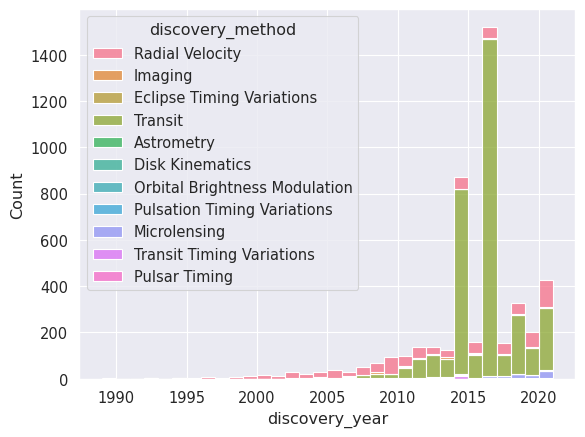

In [19]:
_ = seaborn.histplot(planets.to_pandas(), x='discovery_year', hue='discovery_method', multiple='stack', binwidth=1)

:::{note}
`seaborn` generally works well with `polars` but sometimes it's necessary to convert the dataframe to `pandas` using the `to_pandas()` method.
:::

As we can see the vast majority of early exoplanets were discovered using the radial velocity method, while in recent years the transit method has become the most popular. Even more recently, we are starting to see a significant number of discoveries using microlensing.

## Plotting a galaxy colour-magnitude diagram

We'll finish this section with a real science example: plotting a galaxy colour-magnitude diagram (gCMD). You are probably familiar with the Hertzsprung-Russell diagram, which plots stars by their luminosity and temperature (a stellar CMD is the same but using magnitude colours as proxies for luminosity and temperature). The [galaxy color-magnitude diagram](https://en.wikipedia.org/wiki/Galaxy_color%E2%80%93magnitude_diagram) plots the mass of a a galaxy (usually using the absolute magnitude in the i' or z' bands as a proxy for stellar mass) against a colour that differentiates between blue and red galaxies (e.g., the g'-i' colour). These diagrams started to be prouced in the early 2000s thanks to observations from the Sloan Digital Sky Survey (SDSS), which was the first survey to compile multi-band photometry for hundreds of thousands of galaxies. When a gCMD is plotted we see a clear bimodal distribution, we most galaxies belonging to one of two main populations: blue galaxies, which are actively forming stars, and red galaxies, which are mostly quiescent. Sometimes a third population of "green valley" galaxies is also identified, which are in the process of transitioning from blue to red.

![Galaxy colour-magnitude diagram](./images/gcmd.png){w="60%" align=center}

The gCMD was the first indication that galaxies are not always start forming or quiescent, but that they transition from one state to the other, and that the transition is fast enough that not many galaxies fall in the "green valley". This transition is thought to be driven by a combination of internal and external processes, such as gas accretion, exhaustion of molecular gas, and interactions with other galaxies.

Let's create our own gCMD for the local Universe. We will use some data retrieved using CasJobs. For convenience, we will use the file `sdss_galaxies_flux.parquet` which contains the [Petrosian magnitudes](https://skyserver.sdss.org/dr7/en/help/docs/algorithm.asp?key=mag_petro) in the Sloan filters for all the SDSS galaxies that have an associated redshift measurement (the redshift is given as the `z` column).

In [20]:
galaxies = polars.read_parquet('sdss_galaxies_flux.parquet')
print(galaxies.head(5))
print('Columns:', galaxies.columns)

shape: (5, 13)
┌───────────┬───────────┬──────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ specobjid ┆ bestobjid ┆ z        ┆ petroflux ┆ … ┆ petromag_ ┆ petromag_ ┆ petromag_ ┆ petromag_ │
│ ---       ┆ ---       ┆ ---      ┆ _u        ┆   ┆ g         ┆ r         ┆ i         ┆ z         │
│ i64       ┆ i64       ┆ f64      ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│           ┆           ┆          ┆ f64       ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64       │
╞═══════════╪═══════════╪══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 299489676 ┆ 123764872 ┆ 0.021275 ┆ 140.7772  ┆ … ┆ 15.614503 ┆ 14.845875 ┆ 14.443028 ┆ 14.131927 │
│ 975171584 ┆ 014240161 ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│           ┆ 1         ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ 299489951 ┆ 123764872 ┆ 0.213925 ┆ 10.990943 ┆ … ┆ 18.665163 ┆ 17.663706 ┆

We will plot the absolute i-band magnitude vs the g'-i' colour. The absolute magnitude of a galaxy is often defined as

```{math}
M=m-\mu
```

where $\mu$ is the [distance modulus](https://en.wikipedia.org/wiki/Distance_modulus). For galaxies, the distance modulus can be computed from the redshift but we need to take into account the cosmological effects. To help us with that we will use the `astropy.cosmology` module, which provides a set of cosmological models and functions to compute distances and other cosmological quantities.

In [21]:
from astropy.cosmology import FlatLambdaCDM

# Create our own cosmology model with some reasonable values.
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Compute the distance modulus for each galaxy
d_mod = cosmo.distmod(galaxies['z'].to_list())

# Add the distance modulus to the dataframe
galaxies = galaxies.with_columns(d_mod=polars.Series(d_mod.value, dtype=polars.Float32))

# Compute the absolute i-band magnitude
galaxies = galaxies.with_columns(i_abs=polars.col.petromag_i - polars.col.d_mod)

# Add a column with the g'-i' colour
galaxies = galaxies.with_columns(g_i=polars.col.petromag_g - polars.col.petromag_i)

We could use all these data to plot the gCMD, but the result would not look very clear. The problem is that we have galaxies with very different redshifts, which means different stages in the galaxy evolution. We would also need to apply a [K correction](https://en.wikipedia.org/wiki/K_correction) to compare "apples to apples". Instead, let's focus on the local Universe and select only galaxies with a redshift below 0.05.

In [22]:
# Select only galaxies with a redshift below 0.05
local = galaxies.filter(polars.col.z < 0.05)
print(f'Number of galaxies: {len(local)}')

Number of galaxies: 123026


Time to do some plotting! We will start with a simple scatter plot of the absolute i-band magnitude vs the g'-i' colour.

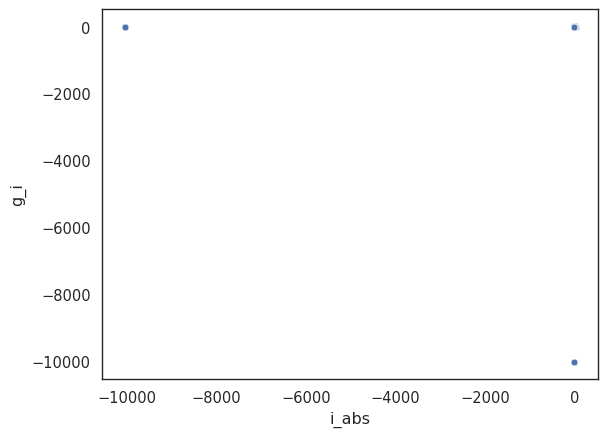

In [23]:
seaborn.set_style('white')

_ = seaborn.scatterplot(x=local['i_abs'], y=local['g_i'])

This doesn't look very promising. The problem is that we have a few outliers that are skewing the plot. Let's remove those outliers by selecting only galaxies with an absolute magnitude between -25 and -16, and a g'-i' colour between 0 and 2. You can play with these values to see how they affect the plot.

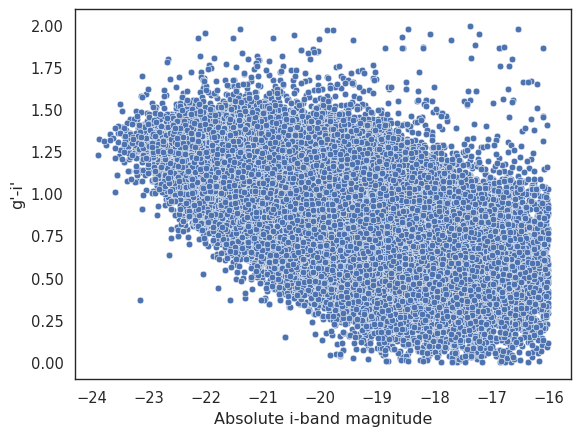

In [24]:
local = local.filter((polars.col.i_abs > -25) & (polars.col.i_abs < -16) & (polars.col.g_i > 0) & (polars.col.g_i < 2))

_ = seaborn.scatterplot(x=local['i_abs'], y=local['g_i'])
_ = plt.xlabel('Absolute i-band magnitude')
_ = plt.ylabel('g\'-i\'')

That is significantly better, but the cloud of points is so large that it's difficult to see any details of the underlying distribution. Let's use a 2D histogram to plot the density of the points in the gCMD. We will use the `seaborn.histplot` function with the `cbar` parameter to add a colour bar that shows the density of the points. We will also use the `pthresh` parameter to remove points with a density below a certain threshold.

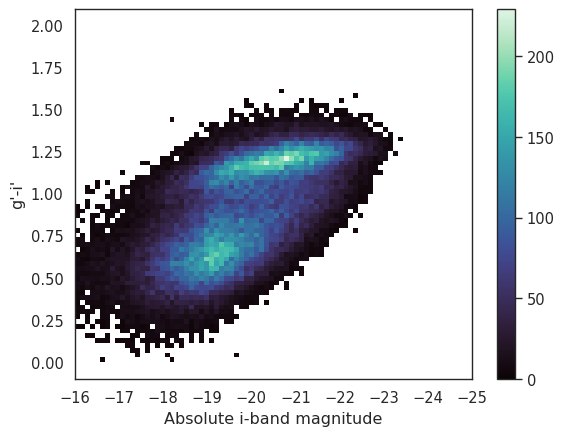

In [25]:
_ = seaborn.histplot(data=local, x='i_abs', y='g_i', bins=70, pthresh=.01, cmap='mako', cbar=True)
_ = plt.xlabel('Absolute i-band magnitude')
_ = plt.ylabel('g\'-i\'')
_ = plt.xlim(-16, -25)

That is much better. We can clearly see the blue and red clouds. Note that we have reversed the x-axis so that increasing stellar mass (decreasing absolute magnitude) is on the right side of the plot. Alternatively we could use a KDE to plot the density of the points in the gCMD.

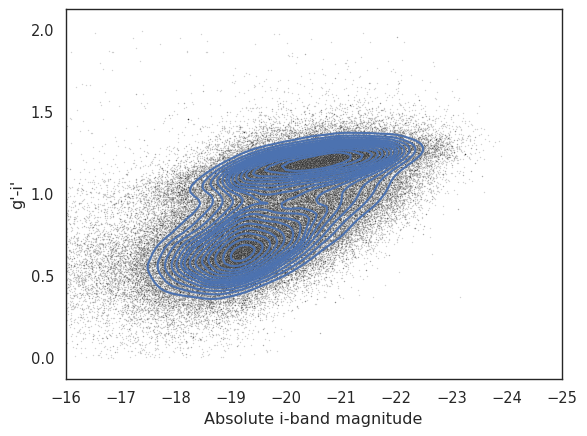

In [26]:
# Plot the cloud of points in the background
_ = seaborn.scatterplot(x=local['i_abs'], y=local['g_i'], s=1, alpha=0.2, color='k')

# Plot the KDE contours. The compute time will depend on the number of bins.
_ = seaborn.kdeplot(data=local, x='i_abs', y='g_i', thresh=0.2, gridsize=100, levels=15, linewidths=1.5)

_ = plt.xlabel('Absolute i-band magnitude')
_ = plt.ylabel('g\'-i\'')
_ = plt.xlim(-16, -25)

Finally, let's plot the same data using filled contours.

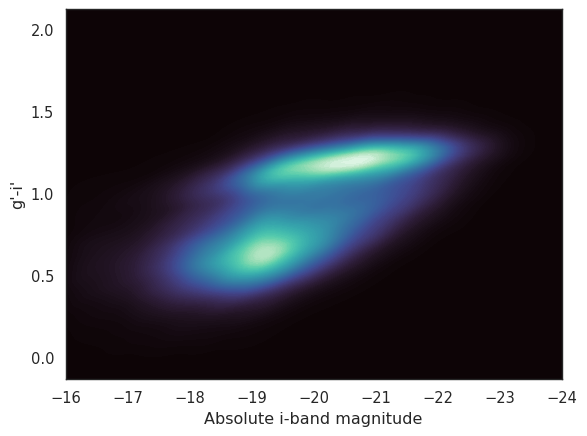

In [27]:
_ = seaborn.kdeplot(data=local, x='i_abs', y='g_i', thresh=0,
                    gridsize=100, levels=150, fill=True, cmap='mako')

_ = plt.xlabel('Absolute i-band magnitude')
_ = plt.ylabel('g\'-i\'')
_ = plt.xlim(-16, -24)